# Big Basket Product - Data Cleaning & Outlier Detection

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# import csv file

Basket_Products = pd.read_csv("C:/Users/HP/Desktop/DATA ANALYST/Datasets/Big Basket Products.csv")

Backup = Basket_Products

In [3]:
Basket_Products.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [4]:
# drop unrelated columns

Basket_Products.drop(Basket_Products.columns[[0,9]], axis=1, inplace=True)
Basket_Products.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


In [5]:
# Total rows and columns

Basket_Products.shape

(27555, 8)

In [6]:
Basket_Products.describe(include='all')

,product,category,sub_category,brand,sale_price,market_price,type,rating
count,27554,27555,27555,27554,27549.000000,27555.000000,27555,18919.000000
unique,23540,11,90,2313,NaN,NaN,426,NaN
top,Turmeric Powder/Arisina Pudi,Beauty & Hygiene,Skin Care,Fresho,NaN,NaN,Face Care,NaN
freq,26,7867,2294,638,NaN,NaN,1508,NaN
mean,NaN,NaN,NaN,NaN,334.648391,382.056664,NaN,3.943295
std,NaN,NaN,NaN,NaN,1202.102113,581.730717,NaN,0.739217
min,NaN,NaN,NaN,NaN,2.450000,3.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,95.000000,100.000000,NaN,3.700000
50%,NaN,NaN,NaN,NaN,190.320000,220.000000,NaN,4.100000
75%,NaN,NaN,NaN,NaN,359.000000,425.000000,NaN,4.300000


In [7]:
# Check for datatype mismatch

Basket_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27549 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18919 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.7+ MB


In [8]:
# Check for null values

Basket_Products.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
dtype: int64

In [9]:
Basket_Products.loc[Basket_Products['product'].isnull()]

,product,category,sub_category,brand,sale_price,market_price,type,rating
14363,NaN,Beverages,Coffee,Cothas Coffee,200.0,240.0,Ground Coffee,4.2


In [10]:
# drop null value

Basket_Products.dropna(subset=['product'], inplace=True)
Basket_Products.isnull().sum()

product            0
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
dtype: int64

In [11]:
Basket_Products.loc[Basket_Products['brand'].isnull()]

,product,category,sub_category,brand,sale_price,market_price,type,rating
9765,Food Package - Medium,Cleaning & Household,"Disposables, Garbage Bag",NaN,50.0,50.0,"Aluminium Foil, Clingwrap",NaN


In [12]:
Basket_Products.dropna(subset=['brand'], inplace=True)
Basket_Products.isnull().sum()

product            0
category           0
sub_category       0
brand              0
sale_price         6
market_price       0
type               0
rating          8635
dtype: int64

In [13]:
Basket_Products.loc[Basket_Products['sale_price']. isnull()]

,product,category,sub_category,brand,sale_price,market_price,type,rating
1719,Puja Flower Wicks - Puvvu Vathulu Batti,Cleaning & Household,Pooja Needs,Jaji,NaN,20.0,Camphor & Wicks,NaN
1720,Powder - Sambar,"Foodgrains, Oil & Masala",Masalas & Spices,Annapoorna,NaN,46.0,Blended Masalas,NaN
1721,"Steel Fork - Medium, Premium Excel Series, BBCL08","Kitchen, Garden & Pets",Crockery & Cutlery,BB Home,NaN,299.0,"Cutlery, Spoon & Fork",NaN
1722,Snack Mix - Dhokla,Snacks & Branded Foods,Ready To Cook & Eat,MTR,NaN,65.0,Breakfast & Snack Mixes,4.1
2401,Battery AA 3UT Hi Top,"Kitchen, Garden & Pets",Appliances & Electricals,Nippo,NaN,150.0,Battery & Electrical,4.0
2402,Klassic Plain Cocktail Napkins (22 X 22 cm),Cleaning & Household,"Disposables, Garbage Bag",Origami,NaN,32.0,Toilet Paper,3.9


In [14]:
# Impute null values of sale price with market price

Basket_Products['sale_price'] = Basket_Products['sale_price'].fillna(Basket_Products['market_price'])
Basket_Products.isnull().sum()

product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          8635
dtype: int64

In [15]:
Basket_Products['rating'] = Basket_Products['rating'].fillna(Basket_Products['rating'].mean())
Basket_Products.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
dtype: int64

In [16]:
# Create new column

Basket_Products['discount']= Basket_Products['market_price']-Basket_Products['sale_price']
Basket_Products.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.0
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.0
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,131.0
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,27.0
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.0


In [17]:
# Top Products

Basket_Products["product"].value_counts()

Turmeric Powder/Arisina Pudi                                     26
Extra Virgin Olive Oil                                           15
Cow Ghee/Tuppa                                                   14
Soft Drink                                                       12
Colorsilk Hair Colour With Keratin                               12
                                                                 ..
Pepper & Herb Salami Chicken                                      1
Nutmeg Powder                                                     1
Disney Mickey Mouse Plastic Kids Sipper Bottle - Coolest Dude     1
Chocolates-Roasted Peanut Chocolate                               1
Green Tea - Pure Original                                         1
Name: product, Length: 23539, dtype: int64

# Removing Outlier using IQR Method

<AxesSubplot: >

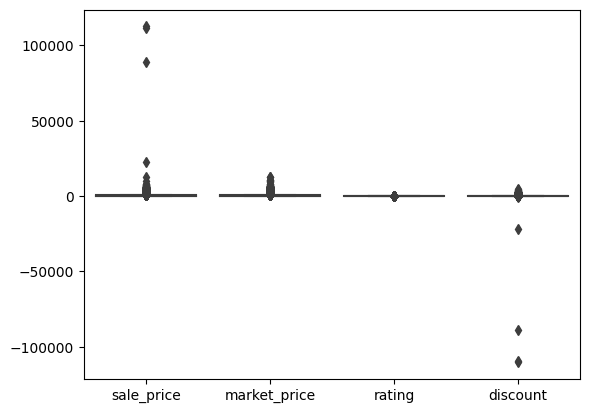

In [18]:
sns.boxplot(data=Basket_Products)

In [19]:
def impute_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1                  
    lower_bound = Q1 - 2.5*IQR
    upper_bound = Q3 + 2.5*IQR
    column[column < lower_bound] = column.mean()
    column[column > upper_bound] = column.mean()
    return column

In [20]:
Basket_Products['sale_price'] = impute_outliers_iqr(Basket_Products['sale_price'])
Basket_Products['market_price'] = impute_outliers_iqr(Basket_Products['market_price'])
Basket_Products['discount']= Basket_Products['market_price'] - Basket_Products['sale_price']

C:\Users\HP\AppData\Local\Temp\ipykernel_11340\4050083630.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_bound] = column.mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_11340\4050083630.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_bound] = column.mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_11340\4050083630.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < low

<AxesSubplot: >

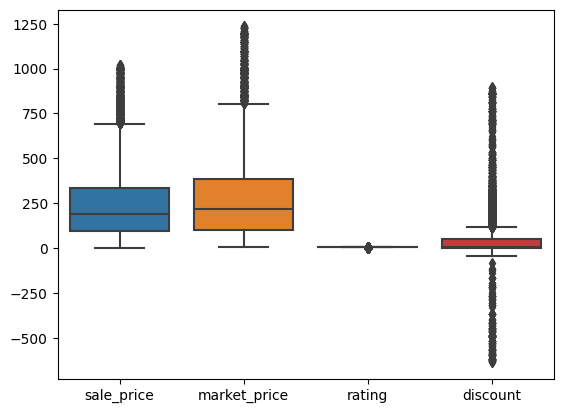

In [21]:
sns.boxplot(data=Basket_Products)

In [22]:
Basket_Products.to_csv('BigBasketProducts_CleanedData.csv')